## Introduction

Introduce the project
team member names

## Data Description

Which data sets and what each row represents

### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Importing the dataset

In [2]:
drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")
races = pd.read_csv("data_raw/races.csv")
circuits = pd.read_csv("data_raw/circuits.csv")



In [3]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


### Merging Data Sets

In [24]:
merged_ResultstoDriver = pd.merge(results,
                        drivers,
                        on = "driverId",
                        how = "left")

merged_CircuitstoRaces = pd.merge(races,
                        circuits,
                        on = "circuitId",
                        how = "left")

races_merge = pd.merge(merged_ResultstoDriver,
                      merged_CircuitstoRaces,
                      on = "raceId",
                      how = "left")

races_merge.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number_x         25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time_x           25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [5]:
races_merge = races_merge[['raceId', 'country', 'position', 
                           'nationality', 'driverId']]

races_merge.info()
races_merge.head()

print(races_merge['country'].unique())
print(races_merge['nationality'].unique())

display(races_merge)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       25840 non-null  int64 
 1   country      25840 non-null  object
 2   position     25840 non-null  object
 3   nationality  25840 non-null  object
 4   driverId     25840 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1009.5+ KB
['Australia' 'Malaysia' 'Bahrain' 'Spain' 'Turkey' 'Monaco' 'Canada'
 'France' 'UK' 'Germany' 'Hungary' 'Belgium' 'Italy' 'Singapore' 'Japan'
 'China' 'Brazil' 'USA' 'Austria' 'Argentina' 'Portugal' 'South Africa'
 'Mexico' 'Netherlands' 'Sweden' 'UAE' 'Morocco' 'Switzerland' 'Korea'
 'India' 'Russia' 'Azerbaijan' 'Qatar' 'Saudi Arabia']
['British' 'German' 'Spanish' 'Finnish' 'Japanese' 'French' 'Polish'
 'Brazilian' 'Italian' 'Australian' 'Austrian' 'American' 'Dutch'
 'Colombian' 'Portuguese' 'Canadian' 'Indian' 'Hungarian' 'Irish' 'Danish'
 '

,raceId,country,position,nationality,driverId
0,18,Australia,1,British,1
1,18,Australia,2,German,2
2,18,Australia,3,German,3
3,18,Australia,4,Spanish,4
4,18,Australia,5,Finnish,5
...,...,...,...,...,...
25835,1096,UAE,16,German,854
25836,1096,UAE,17,Danish,825
25837,1096,UAE,18,British,1
25838,1096,UAE,19,Canadian,849


## Cleaning the Data

In [8]:
# finding out which countries have drivers that race the most

drivers_per_country = races_merge.groupby('nationality').size().reset_index(name='Total_Drivers')

sorted_data = drivers_per_country.sort_values(by = 'Total_Drivers', 
                                                                 ascending = False)

print(sorted_data)

          nationality  Total_Drivers
8             British           4418
24            Italian           3418
18             French           3004
19             German           2384
7           Brazilian           1953
0            American           1279
17            Finnish           1147
36            Spanish            822
4          Australian            821
5            Austrian            690
25           Japanese            635
6             Belgian            591
37            Swedish            510
38              Swiss            496
15              Dutch            480
9            Canadian            452
28            Mexican            422
30      New Zealander            396
2           Argentine            373
34            Russian            213
35      South African            210
14             Danish            177
29         Monegasque            132
12          Colombian            125
41         Venezuelan            120
31             Polish             99
2

In [13]:
races_merge_top5 = races_merge.query("nationality == 'British' | nationality == 'Italian' \
                                | nationality == 'French' | nationality == 'German'\
                                | nationality == 'Brazilian'")
display(races_merge_top5)
races_merge_top5['nationality'].unique()

,raceId,country,position,nationality,driverId,country_to_nationality,home_track
0,18,Australia,1,British,1,Australia,Away
1,18,Australia,2,German,2,Australia,Away
2,18,Australia,3,German,3,Australia,Away
6,18,Australia,7,French,7,Australia,Away
9,18,Australia,\N,German,10,Australia,Away
...,...,...,...,...,...,...,...
25826,1096,UAE,7,French,839,UAE,Away
25829,1096,UAE,10,German,20,UAE,Away
25833,1096,UAE,14,French,842,UAE,Away
25835,1096,UAE,16,German,854,UAE,Away


array(['British', 'German', 'French', 'Brazilian', 'Italian'],
      dtype=object)

In [35]:
# recoding

corr_countries = {
    'UK': 'British',
    'Italy': 'Italian',
    'France': 'French',
    'Germany': 'German',
    'Brazil': 'Brazilian'
}

races_merge_top5["country_to_nationality"] = races_merge_top5["country"].apply(lambda x: corr_countries.get(x,x))

races_merge_top5['home_track'] = races_merge_top5.apply(lambda x: "Home" if x['country_to_nationality'] == x['nationality'] else "Away", axis=1)

races_final = races_merge_top5.drop(columns=['country_to_nationality'])

races_final["position"] = (results["position"]
                          .replace("\\N", np.nan))

races_final.head()

,raceId,country,position,nationality,driverId,home_track
0,18,Australia,1,British,1,Away
1,18,Australia,2,German,2,Away
2,18,Australia,3,German,3,Away
6,18,Australia,7,French,7,Away
9,18,Australia,NaN,German,10,Away


## Recasting position as an integer

In [36]:
races_final.info()

races_final['position'] = pd.to_numeric(races_final['position'])

<class 'pandas.core.frame.DataFrame'>
Index: 15177 entries, 0 to 25837
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       15177 non-null  int64 
 1   country      15177 non-null  object
 2   position     8546 non-null   object
 3   nationality  15177 non-null  object
 4   driverId     15177 non-null  int64 
 5   home_track   15177 non-null  object
dtypes: int64(2), object(4)
memory usage: 830.0+ KB


In [37]:
drivers_agg = (races_final.groupby(["nationality", "home_track"])
                      .agg(mean_position = ('position','mean'),
                           sd_position =   ('position','std'),
                           min_position =  ('position','min'),
                           max_position =  ('position','max')))

display(drivers_agg)

mean_position  sd_position  min_position  max_position
nationality home_track                                                        
Brazilian   Away             7.548879     4.660087           1.0          22.0
            Home             7.237288     5.032100           1.0          21.0
British     Away             6.775065     4.520435           1.0          22.0
            Home             7.262948     4.723831           1.0          22.0
French      Away             8.211964     4.540922           1.0          22.0
            Home             7.649254     4.264308           1.0          20.0
German      Away             7.591241     5.031521           1.0          22.0
            Home             6.866667     4.382803           1.0          22.0
Italian     Away             8.674384     4.477483           1.0          23.0
            Home             7.984127     4.013907           1.0          18.0

In [19]:
drivers_agg = drivers_agg.reset_index()

In [20]:
drivers_agg[['nationality', 'home_track', 'mean_points']]
agg_wide = (pd.pivot(drivers_agg,
                     index = "nationality",
                     columns = "home_track",
                     values = "mean_points")).reset_index()

display(agg_wide)

home_track,nationality,Away,Home
0,Brazilian,7.548879,7.237288
1,British,6.775065,7.262948
2,French,8.211964,7.649254
3,German,7.591241,6.866667
4,Italian,8.674384,7.984127


In [21]:
import seaborn as sns

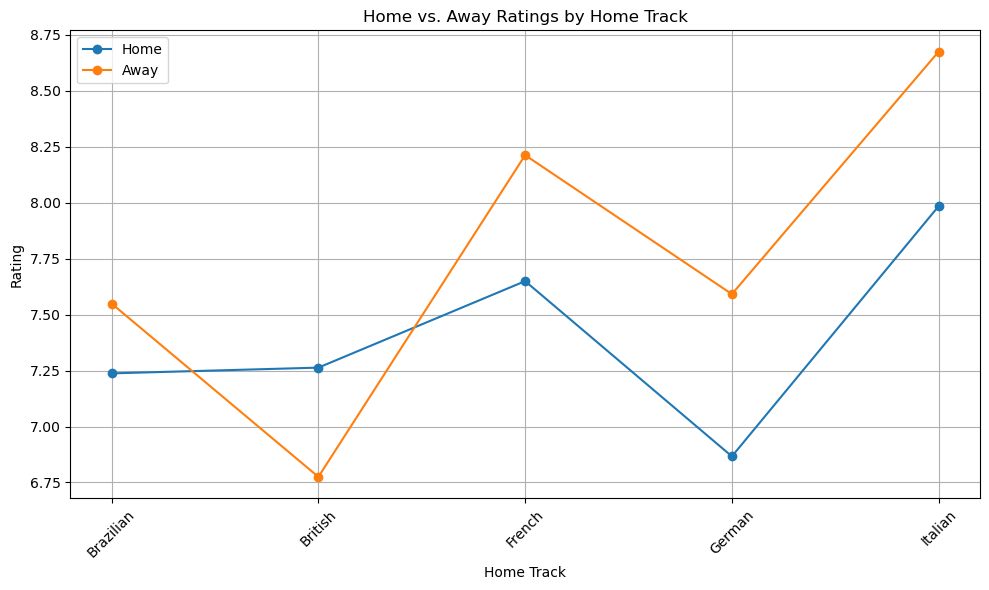

In [22]:
# Plot the paired plot
plt.figure(figsize=(10, 6))

# Plot home vs away
plt.plot(agg_wide['nationality'], agg_wide['Home'], marker='o', linestyle='-', label='Home')
plt.plot(agg_wide['nationality'], agg_wide['Away'], marker='o', linestyle='-', label='Away')

# Add labels and title
plt.xlabel('Home Track')
plt.ylabel('Rating')
plt.title('Home vs. Away Ratings by Home Track')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

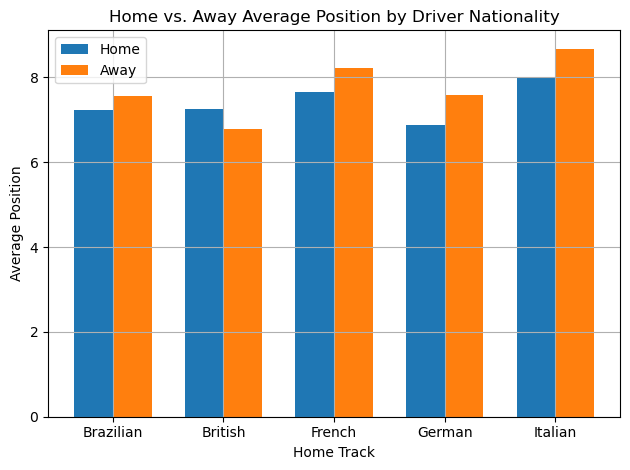

In [23]:
# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
index = np.arange(len(agg_wide['nationality']))

# Plot the bars
plt.bar(index, agg_wide['Home'], bar_width, label='Home')
plt.bar(index + bar_width, agg_wide['Away'], bar_width, label='Away')

# Add labels and title
plt.xlabel('Home Track')
plt.ylabel('Average Position')
plt.title('Home vs. Away Average Position by Driver Nationality')
plt.xticks(index + bar_width / 2, agg_wide['nationality'])
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()